In [30]:
%matplotlib notebook
from matplotlib import pyplot as plt
import os
import xml.etree.ElementTree as ET
import re
import codecs
import urllib.request
import hashlib
from tqdm import tqdm
import datetime

In [3]:
data_path = '/home/nharmon/code/fedbizops/data/ftp.fbo.gov'
listing_path = '/home/nharmon/code/fedbizops/data/listings'

In [47]:
xml_data_files = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.startswith('FBOFeed2')]
listings_files = set([os.path.join(listing_path, f) for f in os.listdir(listing_path)])

In [76]:

start_tags = ['<COMBINE>', '<PRESOL>', '<SRCSGT>', '<AWARD>', '<SNOTE>', '<MOD>']
end_tags = ['</COMBINE>', '</PRESOL>', '</SRCSGT>', '</AWARD>', '</SNOTE>', '</MOD>']


def convertToJson(file):
    with codecs.open(file, 'r', encoding='utf-8', errors='ignore') as f:
        objects = []
        _object = {}
        full_text = []
        for line in f:
            line = line.strip()   
            if True in [line.startswith(tag) for tag in start_tags]:
                full_text = []
                _object = {}
            elif True in [line.startswith(tag) for tag in end_tags]:
                _object['FULLTEXT'] = " \n ".join(full_text)
                objects.append(_object)
                
            elif line.startswith('<YEAR>'):
                _object['YEAR'] = line[-2:]
            else: 
                full_text.append(line.lower())
    return objects

In [77]:
data = []
for xmlfile in tqdm(xml_data_files):
    data.extend(convertToJson(xmlfile))



  0%|          | 0/6535 [00:00<?, ?it/s]

  0%|          | 1/6535 [00:00<30:32,  3.56it/s]

  0%|          | 3/6535 [00:00<25:17,  4.30it/s]

  0%|          | 5/6535 [00:00<21:10,  5.14it/s]

  0%|          | 6/6535 [00:00<20:31,  5.30it/s]

  0%|          | 7/6535 [00:01<21:57,  4.96it/s]

  0%|          | 9/6535 [00:01<18:20,  5.93it/s]

  0%|          | 10/6535 [00:01<19:34,  5.55it/s]

  0%|          | 11/6535 [00:01<19:00,  5.72it/s]

  0%|          | 12/6535 [00:01<17:55,  6.07it/s]

  0%|          | 13/6535 [00:01<17:32,  6.20it/s]

  0%|          | 15/6535 [00:02<14:34,  7.46it/s]

  0%|          | 16/6535 [00:02<15:09,  7.16it/s]

  0%|          | 17/6535 [00:02<15:00,  7.24it/s]

  0%|          | 18/6535 [00:02<15:35,  6.97it/s]

  0%|          | 19/6535 [00:02<14:25,  7.52it/s]

  0%|          | 22/6535 [00:02<11:47,  9.20it/s]

  0%|          | 25/6535 [00:03<10:16, 10.56it/s]

  0%|          | 27/6535 [00:03<10:04, 10.76it/s]

  0%|          | 31/6535 [00:03<08:05, 13.40

  4%|▍         | 283/6535 [00:29<09:54, 10.52it/s]

  4%|▍         | 285/6535 [00:29<09:28, 10.99it/s]

  4%|▍         | 287/6535 [00:29<10:42,  9.72it/s]

  4%|▍         | 289/6535 [00:29<09:08, 11.39it/s]

  4%|▍         | 292/6535 [00:29<08:51, 11.75it/s]

  4%|▍         | 294/6535 [00:30<14:45,  7.05it/s]

  5%|▍         | 296/6535 [00:30<13:22,  7.78it/s]

  5%|▍         | 299/6535 [00:30<10:39,  9.75it/s]

  5%|▍         | 302/6535 [00:30<08:42, 11.92it/s]

  5%|▍         | 304/6535 [00:31<12:40,  8.19it/s]

  5%|▍         | 306/6535 [00:31<13:44,  7.55it/s]

  5%|▍         | 308/6535 [00:31<11:43,  8.85it/s]

  5%|▍         | 310/6535 [00:31<11:39,  8.90it/s]

  5%|▍         | 312/6535 [00:32<13:03,  7.94it/s]

  5%|▍         | 314/6535 [00:32<12:31,  8.28it/s]

  5%|▍         | 316/6535 [00:32<12:51,  8.07it/s]

  5%|▍         | 318/6535 [00:32<13:00,  7.96it/s]

  5%|▍         | 319/6535 [00:33<15:56,  6.50it/s]

  5%|▍         | 321/6535 [00:33<14:06,  7.34it/s]

  5%|▍      

  9%|▉         | 587/6535 [01:01<10:12,  9.72it/s]

  9%|▉         | 591/6535 [01:02<08:44, 11.33it/s]

  9%|▉         | 593/6535 [01:02<07:54, 12.53it/s]

  9%|▉         | 595/6535 [01:02<11:00,  8.99it/s]

  9%|▉         | 597/6535 [01:02<10:10,  9.73it/s]

  9%|▉         | 599/6535 [01:02<10:35,  9.33it/s]

  9%|▉         | 602/6535 [01:03<09:11, 10.77it/s]

  9%|▉         | 604/6535 [01:03<10:07,  9.76it/s]

  9%|▉         | 607/6535 [01:03<08:40, 11.40it/s]

  9%|▉         | 609/6535 [01:03<08:22, 11.78it/s]

  9%|▉         | 611/6535 [01:03<08:22, 11.79it/s]

  9%|▉         | 613/6535 [01:04<07:42, 12.80it/s]

  9%|▉         | 615/6535 [01:04<10:35,  9.31it/s]

  9%|▉         | 617/6535 [01:04<12:50,  7.68it/s]

  9%|▉         | 619/6535 [01:04<11:00,  8.95it/s]

 10%|▉         | 621/6535 [01:05<10:59,  8.97it/s]

 10%|▉         | 623/6535 [01:05<11:30,  8.56it/s]

 10%|▉         | 626/6535 [01:05<10:38,  9.25it/s]

 10%|▉         | 628/6535 [01:05<10:13,  9.63it/s]

 10%|▉      

 14%|█▎        | 896/6535 [01:33<09:05, 10.33it/s]

 14%|█▎        | 898/6535 [01:34<09:00, 10.44it/s]

 14%|█▍        | 900/6535 [01:34<08:50, 10.62it/s]

 14%|█▍        | 902/6535 [01:34<09:38,  9.73it/s]

 14%|█▍        | 904/6535 [01:34<08:52, 10.58it/s]

 14%|█▍        | 906/6535 [01:35<11:58,  7.83it/s]

 14%|█▍        | 907/6535 [01:35<13:33,  6.92it/s]

 14%|█▍        | 909/6535 [01:35<11:52,  7.90it/s]

 14%|█▍        | 911/6535 [01:35<12:33,  7.46it/s]

 14%|█▍        | 913/6535 [01:35<10:56,  8.56it/s]

 14%|█▍        | 914/6535 [01:36<11:58,  7.82it/s]

 14%|█▍        | 915/6535 [01:36<14:51,  6.30it/s]

 14%|█▍        | 918/6535 [01:36<13:24,  6.99it/s]

 14%|█▍        | 920/6535 [01:36<11:05,  8.43it/s]

 14%|█▍        | 922/6535 [01:37<13:40,  6.84it/s]

 14%|█▍        | 923/6535 [01:37<13:12,  7.08it/s]

 14%|█▍        | 925/6535 [01:37<10:51,  8.61it/s]

 14%|█▍        | 927/6535 [01:37<09:50,  9.50it/s]

 14%|█▍        | 929/6535 [01:37<08:44, 10.69it/s]

 14%|█▍     

 18%|█▊        | 1193/6535 [02:03<12:03,  7.39it/s]

 18%|█▊        | 1195/6535 [02:04<12:47,  6.96it/s]

 18%|█▊        | 1196/6535 [02:04<15:00,  5.93it/s]

 18%|█▊        | 1198/6535 [02:04<12:41,  7.01it/s]

 18%|█▊        | 1199/6535 [02:04<13:54,  6.39it/s]

 18%|█▊        | 1201/6535 [02:04<11:45,  7.56it/s]

 18%|█▊        | 1202/6535 [02:05<12:27,  7.13it/s]

 18%|█▊        | 1203/6535 [02:05<12:14,  7.25it/s]

 18%|█▊        | 1204/6535 [02:05<16:50,  5.27it/s]

 18%|█▊        | 1207/6535 [02:05<13:49,  6.42it/s]

 18%|█▊        | 1208/6535 [02:05<15:22,  5.78it/s]

 19%|█▊        | 1209/6535 [02:06<16:38,  5.34it/s]

 19%|█▊        | 1210/6535 [02:06<15:45,  5.63it/s]

 19%|█▊        | 1211/6535 [02:06<15:11,  5.84it/s]

 19%|█▊        | 1212/6535 [02:06<16:23,  5.41it/s]

 19%|█▊        | 1214/6535 [02:07<15:02,  5.90it/s]

 19%|█▊        | 1216/6535 [02:07<13:36,  6.51it/s]

 19%|█▊        | 1217/6535 [02:07<19:58,  4.44it/s]

 19%|█▊        | 1219/6535 [02:07<15:20,  5.77

 22%|██▏       | 1444/6535 [02:33<06:27, 13.15it/s]

 22%|██▏       | 1447/6535 [02:33<05:30, 15.39it/s]

 22%|██▏       | 1449/6535 [02:33<06:21, 13.35it/s]

 22%|██▏       | 1451/6535 [02:34<06:27, 13.11it/s]

 22%|██▏       | 1454/6535 [02:34<06:20, 13.36it/s]

 22%|██▏       | 1458/6535 [02:34<05:55, 14.28it/s]

 22%|██▏       | 1460/6535 [02:34<07:04, 11.94it/s]

 22%|██▏       | 1462/6535 [02:34<07:25, 11.38it/s]

 22%|██▏       | 1464/6535 [02:35<07:35, 11.14it/s]

 22%|██▏       | 1466/6535 [02:35<06:42, 12.59it/s]

 22%|██▏       | 1468/6535 [02:35<09:15,  9.11it/s]

 22%|██▏       | 1470/6535 [02:35<08:15, 10.22it/s]

 23%|██▎       | 1474/6535 [02:35<07:22, 11.44it/s]

 23%|██▎       | 1476/6535 [02:36<08:04, 10.44it/s]

 23%|██▎       | 1478/6535 [02:36<08:08, 10.36it/s]

 23%|██▎       | 1480/6535 [02:36<07:14, 11.64it/s]

 23%|██▎       | 1483/6535 [02:36<07:11, 11.71it/s]

 23%|██▎       | 1485/6535 [02:36<07:04, 11.88it/s]

 23%|██▎       | 1487/6535 [02:37<07:20, 11.46

 27%|██▋       | 1734/6535 [03:05<10:52,  7.36it/s]

 27%|██▋       | 1735/6535 [03:05<12:23,  6.46it/s]

 27%|██▋       | 1737/6535 [03:05<11:16,  7.09it/s]

 27%|██▋       | 1740/6535 [03:06<09:31,  8.39it/s]

 27%|██▋       | 1744/6535 [03:06<07:16, 10.98it/s]

 27%|██▋       | 1746/6535 [03:06<07:02, 11.33it/s]

 27%|██▋       | 1750/6535 [03:06<07:26, 10.71it/s]

 27%|██▋       | 1752/6535 [03:07<07:22, 10.81it/s]

 27%|██▋       | 1754/6535 [03:07<06:22, 12.50it/s]

 27%|██▋       | 1756/6535 [03:07<06:37, 12.04it/s]

 27%|██▋       | 1759/6535 [03:07<06:44, 11.80it/s]

 27%|██▋       | 1761/6535 [03:07<06:34, 12.11it/s]

 27%|██▋       | 1763/6535 [03:07<07:38, 10.42it/s]

 27%|██▋       | 1765/6535 [03:08<09:03,  8.78it/s]

 27%|██▋       | 1767/6535 [03:08<08:26,  9.41it/s]

 27%|██▋       | 1769/6535 [03:08<08:34,  9.26it/s]

 27%|██▋       | 1771/6535 [03:08<07:16, 10.91it/s]

 27%|██▋       | 1773/6535 [03:09<11:14,  7.06it/s]

 27%|██▋       | 1775/6535 [03:09<09:33,  8.30

 32%|███▏      | 2065/6535 [03:36<06:12, 11.99it/s]

 32%|███▏      | 2067/6535 [03:36<06:16, 11.86it/s]

 32%|███▏      | 2069/6535 [03:36<07:44,  9.62it/s]

 32%|███▏      | 2071/6535 [03:36<08:22,  8.88it/s]

 32%|███▏      | 2073/6535 [03:36<07:23, 10.05it/s]

 32%|███▏      | 2075/6535 [03:37<06:49, 10.88it/s]

 32%|███▏      | 2079/6535 [03:37<05:58, 12.44it/s]

 32%|███▏      | 2081/6535 [03:37<06:07, 12.12it/s]

 32%|███▏      | 2083/6535 [03:37<06:44, 11.01it/s]

 32%|███▏      | 2085/6535 [03:37<06:01, 12.29it/s]

 32%|███▏      | 2087/6535 [03:38<06:48, 10.89it/s]

 32%|███▏      | 2089/6535 [03:38<06:53, 10.75it/s]

 32%|███▏      | 2091/6535 [03:38<06:33, 11.30it/s]

 32%|███▏      | 2093/6535 [03:38<08:09,  9.07it/s]

 32%|███▏      | 2095/6535 [03:38<06:55, 10.68it/s]

 32%|███▏      | 2099/6535 [03:38<05:25, 13.62it/s]

 32%|███▏      | 2102/6535 [03:39<04:45, 15.51it/s]

 32%|███▏      | 2106/6535 [03:39<05:07, 14.40it/s]

 32%|███▏      | 2108/6535 [03:39<05:16, 14.01

 36%|███▌      | 2367/6535 [04:06<07:50,  8.86it/s]

 36%|███▋      | 2369/6535 [04:06<06:48, 10.21it/s]

 36%|███▋      | 2371/6535 [04:06<06:29, 10.70it/s]

 36%|███▋      | 2373/6535 [04:07<08:44,  7.94it/s]

 36%|███▋      | 2377/6535 [04:07<07:16,  9.53it/s]

 36%|███▋      | 2379/6535 [04:07<09:28,  7.30it/s]

 36%|███▋      | 2381/6535 [04:07<08:57,  7.72it/s]

 36%|███▋      | 2382/6535 [04:08<13:16,  5.22it/s]

 36%|███▋      | 2384/6535 [04:08<12:54,  5.36it/s]

 37%|███▋      | 2387/6535 [04:08<10:56,  6.32it/s]

 37%|███▋      | 2388/6535 [04:09<10:26,  6.62it/s]

 37%|███▋      | 2389/6535 [04:09<09:31,  7.26it/s]

 37%|███▋      | 2390/6535 [04:09<10:52,  6.36it/s]

 37%|███▋      | 2391/6535 [04:09<11:20,  6.09it/s]

 37%|███▋      | 2392/6535 [04:09<11:34,  5.97it/s]

 37%|███▋      | 2393/6535 [04:09<12:10,  5.67it/s]

 37%|███▋      | 2395/6535 [04:10<10:34,  6.52it/s]

 37%|███▋      | 2396/6535 [04:10<11:32,  5.97it/s]

 37%|███▋      | 2397/6535 [04:10<10:16,  6.71

 40%|████      | 2635/6535 [04:35<09:06,  7.14it/s]

 40%|████      | 2638/6535 [04:35<07:51,  8.27it/s]

 40%|████      | 2639/6535 [04:36<08:11,  7.92it/s]

 40%|████      | 2642/6535 [04:36<07:06,  9.12it/s]

 40%|████      | 2644/6535 [04:36<07:30,  8.65it/s]

 40%|████      | 2646/6535 [04:36<06:58,  9.30it/s]

 41%|████      | 2648/6535 [04:36<07:08,  9.08it/s]

 41%|████      | 2650/6535 [04:37<06:24, 10.10it/s]

 41%|████      | 2652/6535 [04:37<05:55, 10.92it/s]

 41%|████      | 2654/6535 [04:37<06:59,  9.26it/s]

 41%|████      | 2656/6535 [04:37<05:56, 10.88it/s]

 41%|████      | 2658/6535 [04:37<07:24,  8.72it/s]

 41%|████      | 2661/6535 [04:38<05:59, 10.77it/s]

 41%|████      | 2663/6535 [04:38<06:34,  9.81it/s]

 41%|████      | 2665/6535 [04:38<06:03, 10.66it/s]

 41%|████      | 2669/6535 [04:38<05:44, 11.22it/s]

 41%|████      | 2671/6535 [04:39<07:04,  9.09it/s]

 41%|████      | 2674/6535 [04:39<06:09, 10.45it/s]

 41%|████      | 2676/6535 [04:39<05:45, 11.16

 45%|████▍     | 2922/6535 [05:07<06:24,  9.41it/s]

 45%|████▍     | 2924/6535 [05:07<05:37, 10.70it/s]

 45%|████▍     | 2926/6535 [05:07<04:51, 12.40it/s]

 45%|████▍     | 2928/6535 [05:07<06:33,  9.17it/s]

 45%|████▍     | 2930/6535 [05:08<07:14,  8.30it/s]

 45%|████▍     | 2932/6535 [05:08<08:35,  6.99it/s]

 45%|████▍     | 2933/6535 [05:08<11:27,  5.24it/s]

 45%|████▍     | 2935/6535 [05:09<09:20,  6.42it/s]

 45%|████▍     | 2936/6535 [05:09<10:02,  5.97it/s]

 45%|████▍     | 2937/6535 [05:09<10:17,  5.82it/s]

 45%|████▍     | 2938/6535 [05:09<12:14,  4.90it/s]

 45%|████▍     | 2940/6535 [05:09<10:08,  5.90it/s]

 45%|████▌     | 2942/6535 [05:10<08:56,  6.70it/s]

 45%|████▌     | 2943/6535 [05:10<09:18,  6.43it/s]

 45%|████▌     | 2945/6535 [05:10<07:49,  7.64it/s]

 45%|████▌     | 2948/6535 [05:10<07:13,  8.28it/s]

 45%|████▌     | 2949/6535 [05:10<07:27,  8.02it/s]

 45%|████▌     | 2950/6535 [05:11<07:29,  7.98it/s]

 45%|████▌     | 2951/6535 [05:11<10:04,  5.93

 49%|████▉     | 3198/6535 [05:37<07:20,  7.58it/s]

 49%|████▉     | 3200/6535 [05:38<18:23,  3.02it/s]

 49%|████▉     | 3204/6535 [05:38<13:29,  4.12it/s]

 49%|████▉     | 3208/6535 [05:39<10:04,  5.51it/s]

 49%|████▉     | 3211/6535 [05:39<08:37,  6.43it/s]

 49%|████▉     | 3213/6535 [05:39<07:37,  7.26it/s]

 49%|████▉     | 3215/6535 [05:39<06:45,  8.20it/s]

 49%|████▉     | 3217/6535 [05:40<06:52,  8.04it/s]

 49%|████▉     | 3219/6535 [05:40<06:20,  8.71it/s]

 49%|████▉     | 3222/6535 [05:40<05:17, 10.43it/s]

 49%|████▉     | 3224/6535 [05:40<04:59, 11.04it/s]

 49%|████▉     | 3226/6535 [05:40<04:59, 11.04it/s]

 49%|████▉     | 3228/6535 [05:40<04:34, 12.04it/s]

 49%|████▉     | 3230/6535 [05:40<04:12, 13.09it/s]

 49%|████▉     | 3232/6535 [05:41<06:24,  8.59it/s]

 49%|████▉     | 3234/6535 [05:41<07:01,  7.83it/s]

 50%|████▉     | 3236/6535 [05:41<06:13,  8.84it/s]

 50%|████▉     | 3238/6535 [05:42<07:04,  7.77it/s]

 50%|████▉     | 3240/6535 [05:42<06:33,  8.37

 53%|█████▎    | 3486/6535 [06:08<05:11,  9.79it/s]

 53%|█████▎    | 3489/6535 [06:08<04:11, 12.10it/s]

 53%|█████▎    | 3491/6535 [06:08<05:49,  8.71it/s]

 53%|█████▎    | 3493/6535 [06:08<05:37,  9.01it/s]

 53%|█████▎    | 3495/6535 [06:09<04:48, 10.54it/s]

 54%|█████▎    | 3497/6535 [06:09<05:47,  8.75it/s]

 54%|█████▎    | 3499/6535 [06:09<06:23,  7.91it/s]

 54%|█████▎    | 3501/6535 [06:09<06:01,  8.39it/s]

 54%|█████▎    | 3503/6535 [06:10<06:22,  7.93it/s]

 54%|█████▎    | 3504/6535 [06:10<08:10,  6.19it/s]

 54%|█████▎    | 3505/6535 [06:10<08:14,  6.13it/s]

 54%|█████▎    | 3507/6535 [06:10<06:58,  7.24it/s]

 54%|█████▎    | 3508/6535 [06:10<06:39,  7.58it/s]

 54%|█████▎    | 3509/6535 [06:10<06:57,  7.25it/s]

 54%|█████▎    | 3512/6535 [06:11<06:10,  8.16it/s]

 54%|█████▍    | 3513/6535 [06:11<06:20,  7.94it/s]

 54%|█████▍    | 3515/6535 [06:11<05:27,  9.23it/s]

 54%|█████▍    | 3517/6535 [06:11<05:48,  8.66it/s]

 54%|█████▍    | 3518/6535 [06:12<08:14,  6.11

 58%|█████▊    | 3773/6535 [06:39<05:43,  8.05it/s]

 58%|█████▊    | 3774/6535 [06:39<06:03,  7.60it/s]

 58%|█████▊    | 3775/6535 [06:39<06:08,  7.49it/s]

 58%|█████▊    | 3776/6535 [06:39<06:14,  7.37it/s]

 58%|█████▊    | 3778/6535 [06:39<05:13,  8.80it/s]

 58%|█████▊    | 3780/6535 [06:40<05:57,  7.70it/s]

 58%|█████▊    | 3781/6535 [06:40<06:00,  7.64it/s]

 58%|█████▊    | 3782/6535 [06:40<07:19,  6.26it/s]

 58%|█████▊    | 3783/6535 [06:40<06:44,  6.81it/s]

 58%|█████▊    | 3786/6535 [06:40<05:11,  8.83it/s]

 58%|█████▊    | 3788/6535 [06:40<05:06,  8.97it/s]

 58%|█████▊    | 3790/6535 [06:41<04:48,  9.52it/s]

 58%|█████▊    | 3792/6535 [06:41<05:04,  9.00it/s]

 58%|█████▊    | 3794/6535 [06:41<05:13,  8.73it/s]

 58%|█████▊    | 3797/6535 [06:41<04:13, 10.78it/s]

 58%|█████▊    | 3799/6535 [06:42<04:25, 10.32it/s]

 58%|█████▊    | 3802/6535 [06:42<03:41, 12.34it/s]

 58%|█████▊    | 3804/6535 [06:42<06:25,  7.09it/s]

 58%|█████▊    | 3806/6535 [06:42<05:16,  8.62

 62%|██████▏   | 4067/6535 [07:11<05:38,  7.29it/s]

 62%|██████▏   | 4069/6535 [07:12<05:20,  7.70it/s]

 62%|██████▏   | 4071/6535 [07:12<04:57,  8.28it/s]

 62%|██████▏   | 4073/6535 [07:12<04:37,  8.86it/s]

 62%|██████▏   | 4075/6535 [07:12<03:56, 10.42it/s]

 62%|██████▏   | 4078/6535 [07:12<03:35, 11.38it/s]

 62%|██████▏   | 4080/6535 [07:13<03:50, 10.65it/s]

 62%|██████▏   | 4083/6535 [07:13<03:48, 10.72it/s]

 63%|██████▎   | 4085/6535 [07:13<04:23,  9.31it/s]

 63%|██████▎   | 4087/6535 [07:13<04:27,  9.14it/s]

 63%|██████▎   | 4088/6535 [07:14<05:41,  7.17it/s]

 63%|██████▎   | 4089/6535 [07:14<05:34,  7.30it/s]

 63%|██████▎   | 4091/6535 [07:14<04:53,  8.32it/s]

 63%|██████▎   | 4094/6535 [07:14<04:13,  9.62it/s]

 63%|██████▎   | 4096/6535 [07:14<04:47,  8.50it/s]

 63%|██████▎   | 4098/6535 [07:15<04:25,  9.19it/s]

 63%|██████▎   | 4100/6535 [07:15<04:32,  8.93it/s]

 63%|██████▎   | 4101/6535 [07:15<06:33,  6.19it/s]

 63%|██████▎   | 4103/6535 [07:15<05:18,  7.64

 67%|██████▋   | 4360/6535 [07:42<04:43,  7.67it/s]

 67%|██████▋   | 4362/6535 [07:42<05:31,  6.56it/s]

 67%|██████▋   | 4363/6535 [07:42<05:53,  6.15it/s]

 67%|██████▋   | 4365/6535 [07:42<04:51,  7.43it/s]

 67%|██████▋   | 4368/6535 [07:43<03:53,  9.29it/s]

 67%|██████▋   | 4370/6535 [07:43<03:42,  9.73it/s]

 67%|██████▋   | 4372/6535 [07:43<04:32,  7.95it/s]

 67%|██████▋   | 4374/6535 [07:43<04:01,  8.96it/s]

 67%|██████▋   | 4376/6535 [07:44<04:17,  8.38it/s]

 67%|██████▋   | 4378/6535 [07:44<04:59,  7.19it/s]

 67%|██████▋   | 4379/6535 [07:44<04:35,  7.82it/s]

 67%|██████▋   | 4380/6535 [07:44<04:53,  7.34it/s]

 67%|██████▋   | 4382/6535 [07:44<04:49,  7.45it/s]

 67%|██████▋   | 4383/6535 [07:45<05:39,  6.34it/s]

 67%|██████▋   | 4385/6535 [07:45<05:02,  7.12it/s]

 67%|██████▋   | 4387/6535 [07:45<04:27,  8.03it/s]

 67%|██████▋   | 4388/6535 [07:45<04:44,  7.56it/s]

 67%|██████▋   | 4390/6535 [07:45<04:07,  8.68it/s]

 67%|██████▋   | 4392/6535 [07:45<03:25, 10.42

 71%|███████   | 4627/6535 [08:11<03:14,  9.80it/s]

 71%|███████   | 4629/6535 [08:12<03:09, 10.06it/s]

 71%|███████   | 4633/6535 [08:12<02:53, 10.95it/s]

 71%|███████   | 4635/6535 [08:12<03:24,  9.27it/s]

 71%|███████   | 4637/6535 [08:12<03:16,  9.64it/s]

 71%|███████   | 4639/6535 [08:13<03:38,  8.66it/s]

 71%|███████   | 4640/6535 [08:13<03:38,  8.66it/s]

 71%|███████   | 4644/6535 [08:13<02:51, 11.04it/s]

 71%|███████   | 4647/6535 [08:13<02:27, 12.77it/s]

 71%|███████   | 4649/6535 [08:13<02:59, 10.48it/s]

 71%|███████   | 4651/6535 [08:13<02:35, 12.12it/s]

 71%|███████   | 4654/6535 [08:14<02:09, 14.49it/s]

 71%|███████   | 4656/6535 [08:14<03:05, 10.13it/s]

 71%|███████▏  | 4658/6535 [08:14<02:51, 10.93it/s]

 71%|███████▏  | 4660/6535 [08:14<03:26,  9.06it/s]

 71%|███████▏  | 4662/6535 [08:15<03:17,  9.50it/s]

 71%|███████▏  | 4664/6535 [08:15<03:38,  8.56it/s]

 71%|███████▏  | 4666/6535 [08:15<03:05, 10.07it/s]

 71%|███████▏  | 4668/6535 [08:15<03:05, 10.05

 75%|███████▌  | 4931/6535 [08:42<03:03,  8.74it/s]

 76%|███████▌  | 4934/6535 [08:42<02:42,  9.82it/s]

 76%|███████▌  | 4936/6535 [08:43<03:39,  7.30it/s]

 76%|███████▌  | 4938/6535 [08:43<04:23,  6.06it/s]

 76%|███████▌  | 4939/6535 [08:43<04:14,  6.27it/s]

 76%|███████▌  | 4942/6535 [08:44<03:30,  7.57it/s]

 76%|███████▌  | 4944/6535 [08:44<03:18,  8.01it/s]

 76%|███████▌  | 4946/6535 [08:44<02:58,  8.88it/s]

 76%|███████▌  | 4948/6535 [08:44<03:04,  8.62it/s]

 76%|███████▌  | 4949/6535 [08:44<03:39,  7.22it/s]

 76%|███████▌  | 4951/6535 [08:45<03:41,  7.16it/s]

 76%|███████▌  | 4952/6535 [08:45<03:43,  7.08it/s]

 76%|███████▌  | 4954/6535 [08:45<03:13,  8.18it/s]

 76%|███████▌  | 4955/6535 [08:45<03:26,  7.65it/s]

 76%|███████▌  | 4958/6535 [08:45<02:58,  8.83it/s]

 76%|███████▌  | 4960/6535 [08:46<02:41,  9.76it/s]

 76%|███████▌  | 4962/6535 [08:46<03:13,  8.13it/s]

 76%|███████▌  | 4963/6535 [08:46<04:26,  5.90it/s]

 76%|███████▌  | 4964/6535 [08:46<04:24,  5.93

 80%|███████▉  | 5218/6535 [09:14<02:06, 10.42it/s]

 80%|███████▉  | 5220/6535 [09:14<02:46,  7.88it/s]

 80%|███████▉  | 5222/6535 [09:14<03:01,  7.24it/s]

 80%|███████▉  | 5223/6535 [09:14<03:32,  6.17it/s]

 80%|███████▉  | 5225/6535 [09:15<03:18,  6.60it/s]

 80%|███████▉  | 5226/6535 [09:15<03:21,  6.48it/s]

 80%|███████▉  | 5227/6535 [09:15<04:00,  5.44it/s]

 80%|████████  | 5229/6535 [09:15<03:32,  6.15it/s]

 80%|████████  | 5231/6535 [09:16<02:55,  7.41it/s]

 80%|████████  | 5234/6535 [09:16<02:33,  8.49it/s]

 80%|████████  | 5236/6535 [09:16<02:38,  8.19it/s]

 80%|████████  | 5238/6535 [09:16<02:28,  8.71it/s]

 80%|████████  | 5239/6535 [09:16<02:32,  8.49it/s]

 80%|████████  | 5240/6535 [09:17<03:28,  6.22it/s]

 80%|████████  | 5241/6535 [09:17<03:19,  6.50it/s]

 80%|████████  | 5242/6535 [09:17<03:07,  6.90it/s]

 80%|████████  | 5245/6535 [09:17<02:40,  8.05it/s]

 80%|████████  | 5246/6535 [09:17<03:16,  6.57it/s]

 80%|████████  | 5247/6535 [09:17<03:30,  6.12

 84%|████████▍ | 5481/6535 [09:43<02:43,  6.45it/s]

 84%|████████▍ | 5483/6535 [09:43<02:18,  7.60it/s]

 84%|████████▍ | 5485/6535 [09:43<02:09,  8.14it/s]

 84%|████████▍ | 5487/6535 [09:43<02:02,  8.57it/s]

 84%|████████▍ | 5489/6535 [09:44<02:07,  8.23it/s]

 84%|████████▍ | 5491/6535 [09:44<01:58,  8.83it/s]

 84%|████████▍ | 5492/6535 [09:44<02:40,  6.50it/s]

 84%|████████▍ | 5494/6535 [09:44<02:10,  8.00it/s]

 84%|████████▍ | 5496/6535 [09:44<01:54,  9.10it/s]

 84%|████████▍ | 5498/6535 [09:44<01:44,  9.93it/s]

 84%|████████▍ | 5501/6535 [09:45<01:31, 11.32it/s]

 84%|████████▍ | 5504/6535 [09:45<01:37, 10.55it/s]

 84%|████████▍ | 5506/6535 [09:45<01:25, 12.10it/s]

 84%|████████▍ | 5508/6535 [09:45<01:36, 10.65it/s]

 84%|████████▍ | 5510/6535 [09:46<01:33, 10.94it/s]

 84%|████████▍ | 5512/6535 [09:46<01:47,  9.50it/s]

 84%|████████▍ | 5514/6535 [09:46<02:14,  7.59it/s]

 84%|████████▍ | 5516/6535 [09:46<01:59,  8.52it/s]

 84%|████████▍ | 5517/6535 [09:46<01:56,  8.78

 88%|████████▊ | 5774/6535 [10:10<02:16,  5.59it/s]

 88%|████████▊ | 5778/6535 [10:11<01:41,  7.49it/s]

 88%|████████▊ | 5780/6535 [10:11<01:32,  8.17it/s]

 89%|████████▊ | 5785/6535 [10:11<01:12, 10.37it/s]

 89%|████████▊ | 5787/6535 [10:11<01:58,  6.30it/s]

 89%|████████▊ | 5790/6535 [10:12<01:41,  7.33it/s]

 89%|████████▊ | 5792/6535 [10:12<01:39,  7.50it/s]

 89%|████████▊ | 5794/6535 [10:12<02:00,  6.14it/s]

 89%|████████▊ | 5797/6535 [10:13<01:33,  7.88it/s]

 89%|████████▊ | 5799/6535 [10:13<01:20,  9.18it/s]

 89%|████████▉ | 5801/6535 [10:13<01:33,  7.86it/s]

 89%|████████▉ | 5803/6535 [10:13<01:20,  9.15it/s]

 89%|████████▉ | 5807/6535 [10:13<01:02, 11.62it/s]

 89%|████████▉ | 5812/6535 [10:14<00:52, 13.81it/s]

 89%|████████▉ | 5815/6535 [10:14<01:00, 11.87it/s]

 89%|████████▉ | 5817/6535 [10:14<01:09, 10.32it/s]

 89%|████████▉ | 5819/6535 [10:14<01:11, 10.07it/s]

 89%|████████▉ | 5821/6535 [10:15<01:29,  7.96it/s]

 89%|████████▉ | 5823/6535 [10:15<01:40,  7.09

 93%|█████████▎| 6059/6535 [10:41<00:53,  8.84it/s]

 93%|█████████▎| 6061/6535 [10:41<01:03,  7.49it/s]

 93%|█████████▎| 6063/6535 [10:41<00:57,  8.15it/s]

 93%|█████████▎| 6065/6535 [10:41<00:59,  7.96it/s]

 93%|█████████▎| 6067/6535 [10:42<00:52,  8.94it/s]

 93%|█████████▎| 6068/6535 [10:42<01:02,  7.52it/s]

 93%|█████████▎| 6069/6535 [10:42<00:57,  8.07it/s]

 93%|█████████▎| 6070/6535 [10:42<01:38,  4.70it/s]

 93%|█████████▎| 6071/6535 [10:43<01:41,  4.58it/s]

 93%|█████████▎| 6072/6535 [10:43<01:49,  4.22it/s]

 93%|█████████▎| 6075/6535 [10:43<01:28,  5.17it/s]

 93%|█████████▎| 6077/6535 [10:43<01:12,  6.32it/s]

 93%|█████████▎| 6078/6535 [10:43<01:19,  5.75it/s]

 93%|█████████▎| 6081/6535 [10:44<01:09,  6.53it/s]

 93%|█████████▎| 6083/6535 [10:44<01:09,  6.55it/s]

 93%|█████████▎| 6085/6535 [10:44<01:04,  6.99it/s]

 93%|█████████▎| 6088/6535 [10:45<00:57,  7.79it/s]

 93%|█████████▎| 6089/6535 [10:45<01:16,  5.83it/s]

 93%|█████████▎| 6090/6535 [10:45<01:09,  6.43

 97%|█████████▋| 6347/6535 [11:11<00:28,  6.50it/s]

 97%|█████████▋| 6350/6535 [11:12<00:23,  7.81it/s]

 97%|█████████▋| 6351/6535 [11:12<00:25,  7.33it/s]

 97%|█████████▋| 6352/6535 [11:12<00:25,  7.20it/s]

 97%|█████████▋| 6353/6535 [11:12<00:25,  7.13it/s]

 97%|█████████▋| 6354/6535 [11:12<00:25,  7.10it/s]

 97%|█████████▋| 6355/6535 [11:12<00:27,  6.54it/s]

 97%|█████████▋| 6359/6535 [11:12<00:20,  8.59it/s]

 97%|█████████▋| 6361/6535 [11:13<00:28,  6.12it/s]

 97%|█████████▋| 6363/6535 [11:13<00:23,  7.22it/s]

 97%|█████████▋| 6365/6535 [11:13<00:21,  7.84it/s]

 97%|█████████▋| 6367/6535 [11:14<00:18,  9.28it/s]

 97%|█████████▋| 6369/6535 [11:14<00:19,  8.66it/s]

 98%|█████████▊| 6372/6535 [11:14<00:16,  9.85it/s]

 98%|█████████▊| 6374/6535 [11:14<00:16,  9.61it/s]

 98%|█████████▊| 6377/6535 [11:14<00:14, 10.79it/s]

 98%|█████████▊| 6379/6535 [11:15<00:13, 11.35it/s]

 98%|█████████▊| 6381/6535 [11:15<00:12, 11.90it/s]

 98%|█████████▊| 6383/6535 [11:15<00:14, 10.47

In [78]:
print(len(data))
print(data[0])

4266312
{'YEAR': '15', 'FULLTEXT': '<date>0922 \n <agency>department of the air force \n <office>air combat command \n <location>23 cons \n <zip>31699-1794 \n <classcod>s \n <naics>561720 \n <offadd>4380b alabama rd moody afb ga 31699-1794 \n <subject>custodial services \n <solnbr>fa4830-16-r-0001 \n <contact>allison n. lewis, contract specialist, phone 229-257-4722, email allison.lewis.2@us.af.mil - michael a. mcfadden, phone 229-257-4917, fax 229-257-4709, email michael.mcfadden.16@us.af.mil \n <desc><p>&nbsp;</p> \n <p><strong style="mso-bidi-font-weight: normal"><span style="font-size: 12pt; font-family: ">custodial services</span></strong></p> \n <p><span style="font-size: 12pt; font-family: ">moody air force base, ga. intends to issue a solicitation for non-personal services for all management, tools, equipment, and labor necessary to ensure that non-personal custodial services are performed at moody afb georgia, in a manner that will present a clean, neat and professional appear

In [79]:
search_words = [x.lower() for x in ['Machine Learning', 'Artificial Intelligence']]
search_results_by_year = {}

for d in tqdm(data):
    
    if d['YEAR'] not in search_results_by_year:
        search_results_by_year[d['YEAR']] = {}
        search_results_by_year[d['YEAR']]['total'] = 0
        for word in search_words:
            search_results_by_year[d['YEAR']][word] = 0
    
    search_results_by_year[d['YEAR']]['total'] += 1
    for word in search_words:
        if word in d['FULLTEXT']:
            search_results_by_year[d['YEAR']][word] += 1

    
#     listing_name = hashlib.md5(d['URL'].encode()).hexdigest()
#     listing_path = os.path.join(listing_path, listing_name)
#     if listing_path in listings_files:
#         with open(listing_path, 'r') as f:
#             file_text = f.read().lower()
#             for word in search_words:
#                 if word in file_text:
#                     search_results_by_year[d['YEAR']][word] += 1
#                     print(search_results_by_year)



  0%|          | 0/4266312 [00:00<?, ?it/s]

  1%|          | 27522/4266312 [00:00<00:15, 275217.64it/s]

  1%|▏         | 55409/4266312 [00:00<00:15, 276301.38it/s]

  2%|▏         | 83294/4266312 [00:00<00:15, 277059.96it/s]

  3%|▎         | 115584/4266312 [00:00<00:14, 289379.28it/s]

  3%|▎         | 148983/4266312 [00:00<00:13, 301458.44it/s]

  4%|▍         | 179292/4266312 [00:00<00:13, 301944.64it/s]

  5%|▍         | 208986/4266312 [00:00<00:13, 300425.06it/s]

  6%|▌         | 236877/4266312 [00:00<00:14, 284194.73it/s]

  6%|▋         | 271331/4266312 [00:00<00:13, 299955.17it/s]

  7%|▋         | 303532/4266312 [00:01<00:12, 306247.42it/s]

  8%|▊         | 333705/4266312 [00:01<00:12, 304814.92it/s]

  9%|▊         | 366359/4266312 [00:01<00:12, 311022.39it/s]

  9%|▉         | 397272/4266312 [00:01<00:13, 292510.82it/s]

 10%|▉         | 426617/4266312 [00:01<00:13, 281797.59it/s]

 11%|█         | 457329/4266312 [00:01<00:13, 288943.07it/s]

 11%|█▏        | 486373/42

 86%|████████▋ | 3681549/4266312 [00:12<00:01, 304026.75it/s]

 87%|████████▋ | 3712156/4266312 [00:12<00:01, 303141.39it/s]

 88%|████████▊ | 3742614/4266312 [00:12<00:01, 289377.59it/s]

 89%|████████▊ | 3775758/4266312 [00:12<00:01, 300829.86it/s]

 89%|████████▉ | 3807440/4266312 [00:12<00:01, 305453.85it/s]

 90%|████████▉ | 3838198/4266312 [00:12<00:01, 286832.56it/s]

 91%|█████████ | 3869374/4266312 [00:13<00:01, 293149.92it/s]

 91%|█████████▏| 3898990/4266312 [00:13<00:01, 293699.10it/s]

 92%|█████████▏| 3930397/4266312 [00:13<00:01, 299527.07it/s]

 93%|█████████▎| 3960874/4266312 [00:13<00:01, 301076.53it/s]

 94%|█████████▎| 3991628/4266312 [00:13<00:00, 302982.25it/s]

 94%|█████████▍| 4022382/4266312 [00:13<00:00, 304305.47it/s]

 95%|█████████▍| 4052878/4266312 [00:13<00:00, 291607.79it/s]

 96%|█████████▌| 4086220/4266312 [00:13<00:00, 303006.19it/s]

 97%|█████████▋| 4117990/4266312 [00:13<00:00, 307256.30it/s]

 97%|█████████▋| 4150925/4266312 [00:13<00:00, 313566.4

In [83]:
search_results_by_year

{'15': {'total': 292342,
  'machine learning': 43,
  'artificial intelligence': 16},
 '14': {'total': 282565,
  'machine learning': 27,
  'artificial intelligence': 22},
 '02': {'total': 139735, 'machine learning': 3, 'artificial intelligence': 27},
 '01': {'total': 4738, 'machine learning': 0, 'artificial intelligence': 0},
 '09': {'total': 264926, 'machine learning': 6, 'artificial intelligence': 31},
 '08': {'total': 204073, 'machine learning': 7, 'artificial intelligence': 27},
 '06': {'total': 158390, 'machine learning': 8, 'artificial intelligence': 19},
 '05': {'total': 146986, 'machine learning': 6, 'artificial intelligence': 9},
 '19': {'total': 265867,
  'machine learning': 165,
  'artificial intelligence': 179},
 '18': {'total': 339172,
  'machine learning': 208,
  'artificial intelligence': 179},
 '17': {'total': 337747,
  'machine learning': 100,
  'artificial intelligence': 74},
 '16': {'total': 305598,
  'machine learning': 68,
  'artificial intelligence': 30},
 '03': {'

In [87]:
# del search_results_by_year['29']
# del search_results_by_year['01']
# del search_results_by_year['98']
# del search_results_by_year[' 06']
del search_results_by_year['99']


# del search_results_by_year['99']
# del search_results_by_year['99']
# del search_results_by_year['99']
del search_results_by_year['69']

In [88]:
X = sorted([int('20' + x) for x in search_results_by_year.keys()])
Y_ml = [search_results_by_year[str(x)[-2:]]['machine learning'] for x in X]
Y_ai = [search_results_by_year[str(x)[-2:]]['artificial intelligence'] for x in X]
Y_total = [search_results_by_year[str(x)[-2:]]['total'] for x in X]
X = [datetime.datetime(year=year, month=1, day=1) for year in X]

<IPython.core.display.Javascript object>


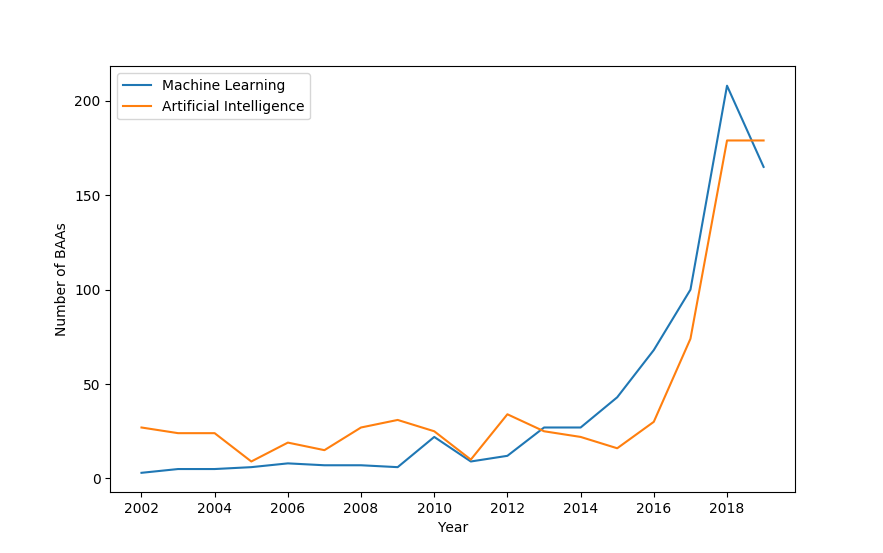

In [89]:
plt.plot(X, Y_ml, label='Machine Learning')
plt.plot(X, Y_ai, label='Artificial Intelligence')
plt.xlabel("Year")
plt.ylabel("Number of BAAs")
plt.legend()

In [90]:
#Dump csv 
with open('data.csv', 'w') as f:
    f.write('Year,AI,ML,Total\n')
    for year, t, ai, ml in zip(X, Y_total, Y_ai, Y_ml):
        f.write('{},{},{},{}\n'.format(year, ai, ml, t))
